In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
#importing the dataset
df=pd.read_csv('USA_Housing.csv')

In [4]:
df.sample(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
3927,68742.987316,6.068788,7.316551,4.44,34008.881879,1.218566e+06,"PSC 7604, Box 4292\nAPO AP 69437-0477"
4449,39777.606906,5.804627,7.147719,3.16,38725.424303,6.960145e+05,"5231 David Shoals\nEast Chaseland, MO 54930-5094"
4724,60698.815488,7.951046,6.225802,2.50,48495.319734,1.433494e+06,"95025 Martin Cliff Apt. 700\nNathanfort, NH 34130"
3454,72029.312855,7.072146,5.378450,3.41,42143.262812,1.205879e+06,"56156 Leonard Skyway Apt. 157\nNorth Jamie, LA..."
2665,77417.222837,5.663860,7.580907,6.29,26527.297949,1.145351e+06,"286 Michael Knoll\nPort Michael, OH 62328-6328"


In [5]:
print(df.shape)

(5000, 7)


In [6]:
#null values
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

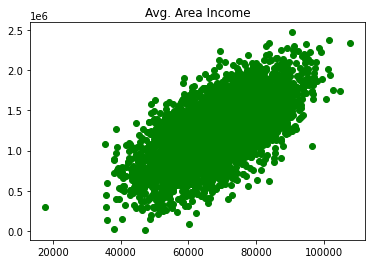

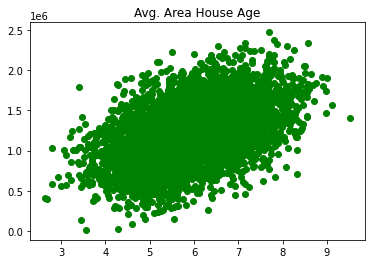

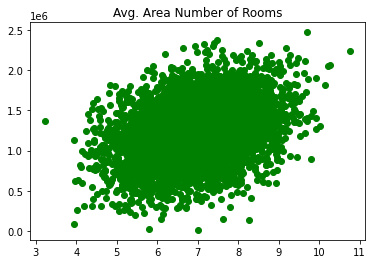

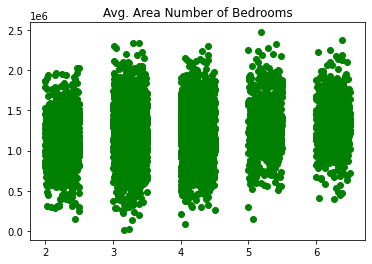

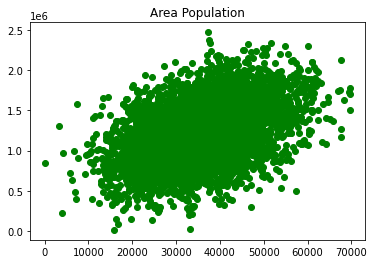

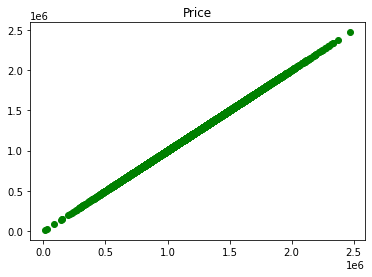

<Figure size 432x288 with 0 Axes>

In [7]:
for feature in df:
    if feature != 'Address':
        plt.scatter(df[feature],df['Price'],color='green',marker='o',cmap='viridis')
        plt.title(feature)
        fig = plt.figure()
        

In [8]:
continuous_feature=[feature for feature in df if feature not in ['Price']+['Address']]

In [9]:
print("Count of continuous feature {}".format(len(continuous_feature)))

Count of continuous feature 5


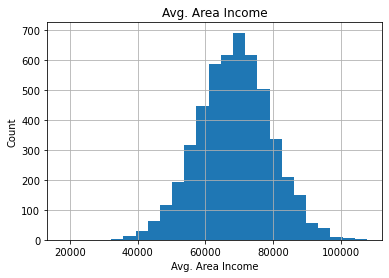

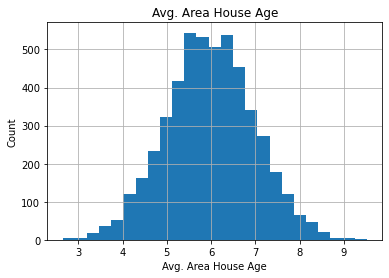

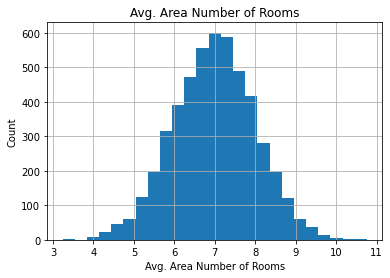

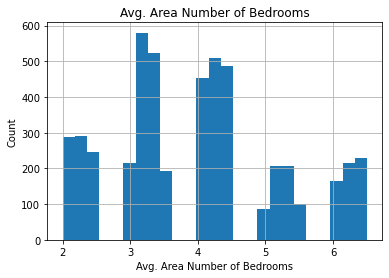

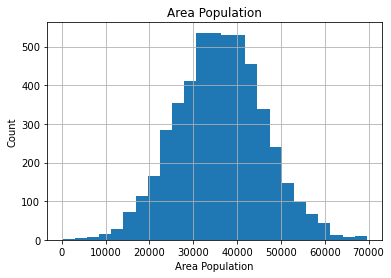

In [10]:
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

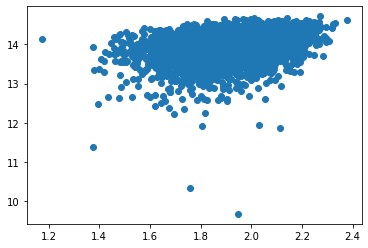

In [11]:
data=df.copy()
data['Avg. Area Number of Rooms']=np.log(data['Avg. Area Number of Rooms'])
data['Price']=np.log(data['Price'])
plt.scatter(data['Avg. Area Number of Rooms'],data['Price'])

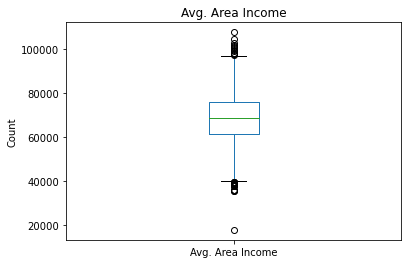

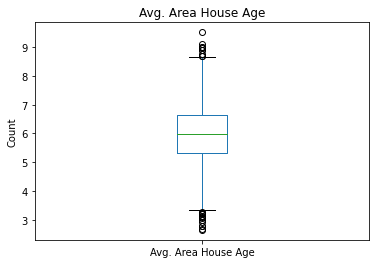

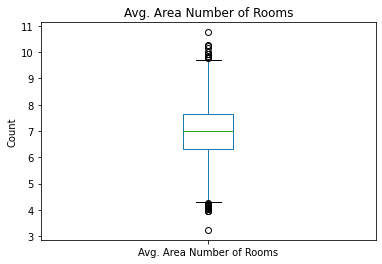

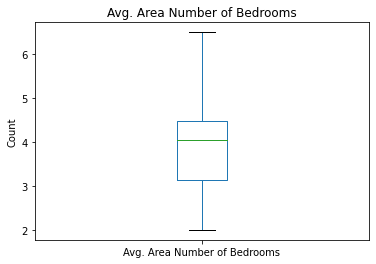

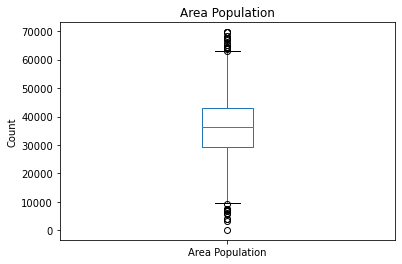

In [12]:
##FEATURE ENGINEERING
##check for outliers
for feature in continuous_feature:
    data=df.copy()
    data[feature].plot(kind='box')
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [13]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.75)
    IQR=Q3-Q1
    
    lower_boundary=Q1- IQR*1.5
    upper_boundary=Q1+IQR*1.5
    
    ls=df.index[(df[ft]<lower_boundary) | (df[ft]>upper_boundary)]
    
    return ls

In [14]:
index_list=[]
for feature in ['Area Population','Avg. Area Income','Avg. Area House Age','Avg. Area Number of Rooms']:
    index_list.extend(outliers(df,feature))

In [15]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [16]:
df_cleaned=remove(df,index_list)

<AxesSubplot:>

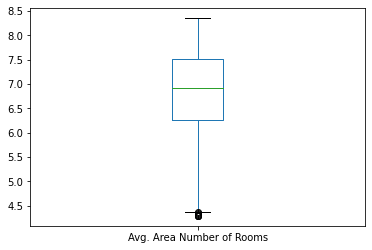

In [17]:
df_cleaned['Avg. Area Number of Rooms'].plot(kind='box')

In [18]:
#feature scaling
df_cleaned.drop(['Avg. Area Number of Bedrooms','Address'],axis=1,inplace=True)

In [19]:
df_cleaned.head(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06


In [20]:
feature_df=[feature for feature in df_cleaned.columns if feature not in ['Price']]

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df_cleaned[feature_df])

MinMaxScaler()

In [22]:
check_df=pd.concat([df_cleaned[['Price']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(df_cleaned[feature_df]),columns=feature_df)],
                   axis=1)

In [23]:
check_df.head(2)

,Price,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,1.059034e+06,0.921015,0.584593,0.669908,0.339144
1,1.505891e+06,0.914070,0.666048,0.601323,0.765261


In [115]:
##FEATURE SELECTION
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [116]:
y=check_df[['Price']]

In [117]:
x=check_df.drop('Price',axis=1)

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [120]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [121]:
clf.fit(x_train,y_train)

LinearRegression()

In [122]:
clf.predict(x_test)

array([[1054131.00679895],
       [ 846364.72290691],
       [1474477.75918598],
       [1364030.83016609],
       [1187639.23389024],
       [1210014.49467468],
       [1350718.85307978],
       [1330135.39253124],
       [ 244289.88434078],
       [1456136.91976592],
       [ 820876.57985358],
       [1391202.54009074],
       [1027093.10577058],
       [1124205.09652721],
       [1297590.2246343 ],
       [ 765741.70131569],
       [ 773342.80719188],
       [1421593.12494116],
       [1403228.36567195],
       [ 870117.35998516],
       [1093351.1987415 ],
       [ 461484.77229618],
       [ 345674.78895541],
       [1049264.42478975],
       [ 856366.57286745],
       [ 786671.80302639],
       [1527049.31040256],
       [1287070.48657457],
       [1420242.69330768],
       [ 996790.63962183],
       [1260268.11921054],
       [1353162.5297994 ],
       [1082209.25712725],
       [1025981.62399181],
       [1516812.90836237],
       [1277336.0881431 ],
       [ 670715.06835237],
 

In [123]:
clf.score(x_test,y_test)

0.8921181268831856

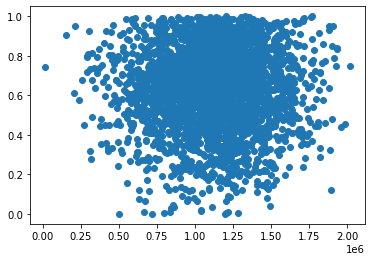

In [124]:
plt.scatter(y_train,x_test)

In [125]:
##XGBoost

In [126]:
from xgboost import XGBRegressor
reg_boost=XGBRegressor()
reg_boost.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [127]:
y_pred_boost=reg_boost.predict(x_train)

In [128]:
reg_boost.score(x_train, y_train)

0.9789262378285917

Text(0.5, 1.0, 'Prices vs Predicted Prices ')

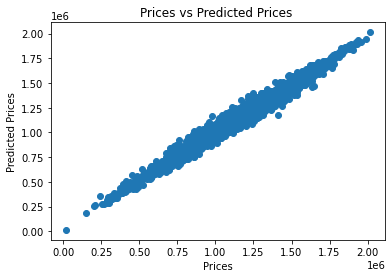

In [129]:
plt.scatter(y_train,y_pred_boost)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices ')

In [130]:
reg_boost.fit(x_test,y_test)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
y_pred_test=reg_boost.predict(x_test)

In [132]:
reg_boost.score(x_test,y_test)

0.9992689596900264

In [133]:
acc_xgb=metrics.r2_score(y_test,y_pred_test)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_pred_test))*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

R^2: 0.9992689596900264
Adjusted R^2: 0.9992646657675008
MAE: 5882.716953985185
MSE: 68063299.17447324
RMSE: 8250.048434674383


In [134]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [135]:
lm=LinearRegression()

In [136]:
lm.fit(x_train,y_train)

LinearRegression()

In [137]:
y_pred=lm.predict(x_train)

In [138]:
print('R^2:', metrics.r2_score(y_train,y_pred))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_train,y_pred))
print('MSE:',metrics.mean_squared_error(y_train,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred)))

R^2: 0.8871659607680931
Adjusted R^2: 0.8870011794037529
MAE: 81485.23495398807
MSE: 10380327306.304071
RMSE: 101883.89129938094


Text(0.5, 1.0, 'Prices vs Predicted Prices ')

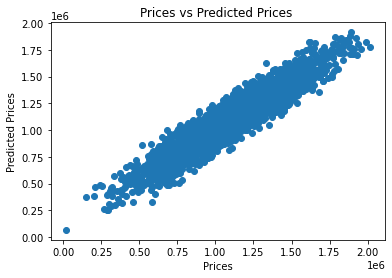

In [139]:
plt.scatter(y_train,y_pred)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices ')

Text(0.5, 1.0, 'Predicted vs Residuals ')

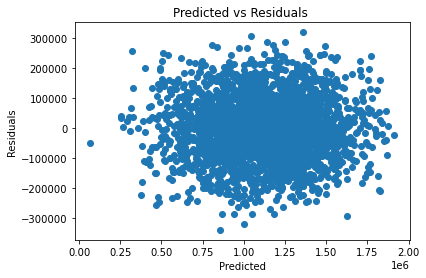

In [140]:
#errors
plt.scatter(y_pred,y_train-y_pred)
plt.ylabel('Residuals')
plt.xlabel('Predicted')
plt.title('Predicted vs Residuals ')

Text(0.5, 1.0, 'Histogram of Residuals')

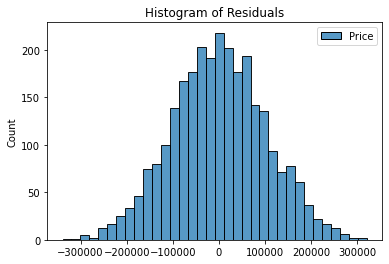

In [141]:
import seaborn as sns
sns.histplot(y_train-y_pred)
plt.title('Histogram of Residuals')

In [142]:
#on test data
y_pred_lmtest=lm.predict(x_test)

In [143]:
acc_linreg=metrics.r2_score(y_test,y_pred_lmtest)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_pred_lmtest))*(len(y_test)-1)/(len(y_test)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_lmtest))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_lmtest))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_lmtest)))

R^2: 0.8921181268831856
Adjusted R^2: 0.8914844594933659
MAE: 80982.91940414274
MSE: 10044310970.645418
RMSE: 100221.30996272908


In [144]:
#model evaluation with Random Forest

In [145]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(x_train,y_train)

<ipython-input-145-61082ace50cd>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

In [146]:
y_pred_rf=reg.predict(x_train)

In [147]:
print('R^2:', metrics.r2_score(y_train,y_pred_rf))
print('Adjusted R^2:',1-(1-metrics.r2_score(y_train,y_pred_rg))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_train,y_pred_rf))
print('MSE:',metrics.mean_squared_error(y_train,y_pred_rf))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train,y_pred_rf)))

R^2: 0.9799849859249615
Adjusted R^2: 0.980126983584792
MAE: 34011.35892470269
MSE: 1841309577.7965477
RMSE: 42910.48330882032


Text(0.5, 1.0, 'Prices vs Predicted Prices ')

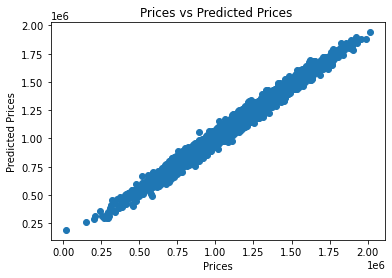

In [148]:
plt.scatter(y_train,y_pred_rf)
plt.xlabel('Prices')
plt.ylabel('Predicted Prices')
plt.title('Prices vs Predicted Prices ')

In [149]:
#on testing data
y_pred_test=reg.predict(x_test)

In [150]:
acc_rf=metrics.r2_score(y_test,y_pred_test)
print('Accuracy R^2:', acc_rf)
print('Adjusted R^2:',1-(1-metrics.r2_score(y_test,y_pred_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:', metrics.mean_absolute_error(y_test,y_pred_test))
print('MSE:',metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Accuracy R^2: 0.865763965537384
Adjusted R^2: 0.8649755013114655
MAE: 89668.55223788894
MSE: 12498007632.374376
RMSE: 111794.48838102161


In [152]:
models=pd.DataFrame({
    'Model':['Linear Regression','Random Forest','XGBoost'],
    'R_Squared_Score':[acc_linreg*100,acc_rf*100,acc_xgb*100]
})
models.sort_values(by='R_Squared_Score',ascending=False)

,Model,R_Squared_Score
2,XGBoost,99.926896
0,Linear Regression,89.211813
1,Random Forest,86.576397


In [49]:
##CHOROPLETH

In [50]:
import requests
import seaborn as sns
import json
import chart_studio.plotly as py

In [51]:
usa_states=json.load(open('states.geojson','r'))

In [52]:
usa_states['features'][0]

{'type': 'Feature',
 'id': 0,
 'properties': {'STATEFP': '31', 'STUSPS': 'NE', 'NAME': 'Nebraska'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-104.053028, 43.000587],
     [-103.618334, 43.000679],
     [-103.132955, 43.000784],
     [-102.487329, 42.999559],
     [-101.849982, 42.999329],
     [-101.625424, 42.996238],
     [-101.000429, 42.99753],
     [-100.631728, 42.998092],
     [-99.918401, 42.998057],
     [-99.471353, 42.997967],
     [-98.899944, 42.998122],
     [-98.49855, 42.99856],
     [-98.467356, 42.947556],
     [-98.342408, 42.900847],
     [-98.325864, 42.8865],
     [-98.258276, 42.87439],
     [-98.219826, 42.853157],
     [-98.129038, 42.821228],
     [-98.035034, 42.764205],
     [-97.950147, 42.769619],
     [-97.888562, 42.817251],
     [-97.875345, 42.858724],
     [-97.84527, 42.867734],
     [-97.774456, 42.849774],
     [-97.686506, 42.842435],
     [-97.603762, 42.858329],
     [-97.561928, 42.847552],
     [-97.504847, 42.858477],
     [

In [53]:
url='https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population_density'

In [154]:
states_df=pd.read_html(url)

In [162]:
state_df=states_df[2]

In [163]:
state_df.head(2)

,Legend
0,Division totals – 9 divisions for 50 States an...
1,Region totals – 4 regions ( 2 or 3 divisions e...


In [57]:
state_df.drop([2,4,6,7,9,13,15,20,21,26,33,37,41,42,43,50,56,57,61],axis=0,inplace=True)

In [58]:
state_df.drop(16,axis=0,inplace=True)

In [59]:
usa_states['features'][1]['properties']

{'STATEFP': '53', 'STUSPS': 'WA', 'NAME': 'Washington'}

In [60]:
state_id_map={}
for feature in usa_states['features']:
    feature['id_1']=feature['properties']['STATEFP']
    state_id_map[feature['properties']['NAME']]=feature['id_1']

In [61]:
state_id_map

{'Nebraska': '31',
 'Washington': '53',
 'New Mexico': '35',
 'South Dakota': '46',
 'Kentucky': '21',
 'Georgia': '13',
 'Arkansas': '05',
 'Pennsylvania': '42',
 'Mississippi': '28',
 'Colorado': '08',
 'Utah': '49',
 'Tennessee': '47',
 'Wyoming': '56',
 'Indiana': '18',
 'Alaska': '02',
 'Nevada': '32',
 'Illinois': '17',
 'Vermont': '50',
 'Montana': '30',
 'Iowa': '19',
 'South Carolina': '45',
 'Arizona': '04',
 'Ohio': '39',
 'Alabama': '01',
 'Wisconsin': '55',
 'Oregon': '41',
 'Missouri': '29',
 'North Carolina': '37',
 'Oklahoma': '40',
 'Virginia': '51',
 'West Virginia': '54',
 'Louisiana': '22',
 'Michigan': '26',
 'Massachusetts': '25',
 'Idaho': '16',
 'Florida': '12',
 'Kansas': '20',
 'New Hampshire': '33',
 'Delaware': '10',
 'Texas': '48',
 'Minnesota': '27',
 'Connecticut': '09',
 'New Jersey': '34',
 'North Dakota': '38',
 'Maryland': '24',
 'Maine': '23',
 'Hawaii': '15',
 'Rhode Island': '44',
 'California': '06',
 'New York': '36',
 'District of Columbia': '11

In [62]:
state_df['id']=state_df['State/Territory/Division/Region'].apply(lambda x: state_id_map[x])

In [63]:
import plotly.express as px

In [64]:
import plotly.io as pio
pio.renderers.default='browser'

In [65]:
state_df['new_sqkm']=np.log10(state_df['Population/sqmi'])

In [66]:
fig=px.choropleth(state_df,
                  locations='id',
                  geojson=usa_states,color='new_sqkm',
                  hover_name='State/Territory/Division/Region',
                  hover_data=['Population/sqmi'],
                  scope='north america')
fig.update_geos(fitbounds='locations',visible=False)
fig.show()

In [67]:
fig=px.choropleth_mapbox(state_df,
                  locations='id',
                  geojson=usa_states,color='new_sqkm',
                  hover_name='State/Territory/Division/Region',
                  hover_data=['Population/sqmi'],
                    mapbox_style='carto-positron',
                    center={'lat':40,'lon':270},
                    zoom=3)
fig.show()